<a href="https://colab.research.google.com/github/annnanya/Fakenews/blob/main/HandwrittenDigitsRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Handwritten Digits Recognition**

In [ ]:
#Import the libraries and load the MNIST dataset
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
mnist = keras.datasets.mnist

(X_train_full, y_train_full),(X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
columns = ["pixel {}".format(i) for i in range(784)]

In [ ]:
train_df = pd.DataFrame(X_train_full.reshape((60000, 784)), columns=columns)

In [ ]:
train_df

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,pixel 10,pixel 11,pixel 12,pixel 13,pixel 14,pixel 15,pixel 16,pixel 17,pixel 18,pixel 19,pixel 20,pixel 21,pixel 22,pixel 23,pixel 24,pixel 25,pixel 26,pixel 27,pixel 28,pixel 29,pixel 30,pixel 31,pixel 32,pixel 33,pixel 34,pixel 35,pixel 36,pixel 37,pixel 38,pixel 39,...,pixel 744,pixel 745,pixel 746,pixel 747,pixel 748,pixel 749,pixel 750,pixel 751,pixel 752,pixel 753,pixel 754,pixel 755,pixel 756,pixel 757,pixel 758,pixel 759,pixel 760,pixel 761,pixel 762,pixel 763,pixel 764,pixel 765,pixel 766,pixel 767,pixel 768,pixel 769,pixel 770,pixel 771,pixel 772,pixel 773,pixel 774,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train_full[10].shape

(28, 28)

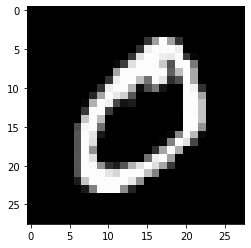

In [ ]:
plt.imshow(X_train_full[1], cmap='gray')
plt.show()

In [ ]:
y_train_full[1]

0

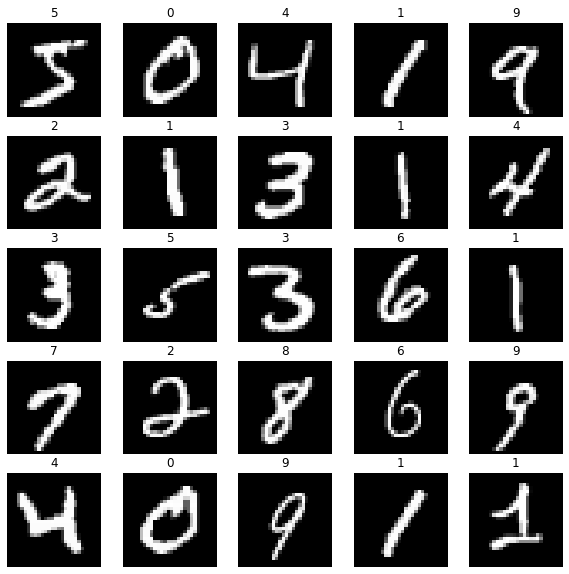

In [ ]:
# first 25 images
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(X_train_full[i], cmap='gray')
  plt.title(y_train_full[i])
  plt.axis('off')

# **Normalizing the data**

In [ ]:
# scale the features
X_train_full_updated = X_train_full/255.0 

In [ ]:
# One Hot encoding
y_train_full_updated = keras.utils.to_categorical(y_train_full)
y_test_updated = keras.utils.to_categorical(y_test)
y_train_full_updated 

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

# **Create the model**

In [ ]:
# Import the required layers
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.callbacks import EarlyStopping

# Model object
model = Sequential()

# add layers
model.add(Flatten(input_shape = [28, 28])) #---> Input layer
model.add(Dense(200, activation='relu')) #--> Hidden Layer 1
model.add(Dense(100, activation='relu')) #--> Hidden Layer 2

#--> Add your own layer
model.add(Dense(10, activation='softmax')) #---> Output layer
model.summary()

# Callback
cb = EarlyStopping(patience=10)


# Compile the model #--> SGD, Adam, RMSPROP, ..... # error function
model.compile(optimizer='sgd', loss = 'categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(X_train_full_updated, y_train_full_updated, epochs=1000, validation_split=0.2, callbacks=cb)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
1500/1500 [==============================] - 20s 3ms/step - loss: 1.0673 - accuracy: 0.7166 - val_loss: 0.3276 - val_accuracy: 0.9089
Epoch 2/1000
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3197 - accuracy: 0.90

In [ ]:
model.evaluate(X_test, y_test_updated)

313/313 [==============================] - 1s 2ms/step - loss: 15.9944 - accuracy: 0.9762


[15.994379997253418, 0.9761999845504761]

# **Visulisation**

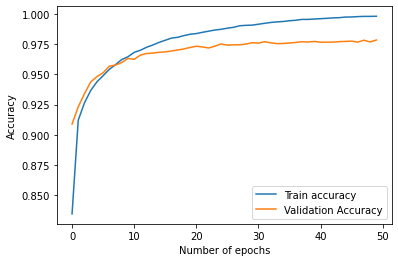

In [ ]:
h= hist.history
plt.plot(h['accuracy'], label = 'Train accuracy')
plt.plot(h['val_accuracy'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.show()

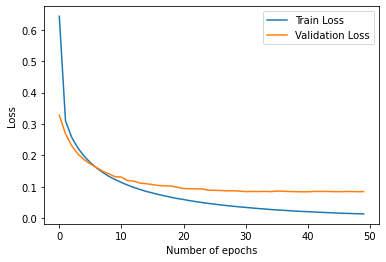

In [ ]:
plt.plot(h['loss'], label = 'Train Loss')
plt.plot(h['val_loss'], label = 'Validation Loss')
plt.legend()
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.show()